In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# <font color = 'red'>Task1 </font>

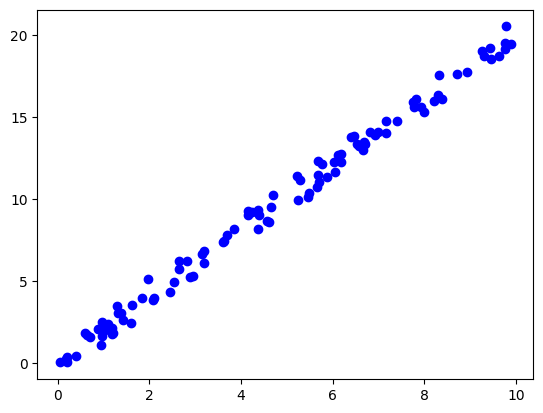

In [42]:
#生成人工数据集
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2 * X + 0.5* np.random.randn(100, 1)
# 绘制原始数据集
plt.scatter(X, y, color="blue", label="Original Data")

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+02, tolerance: 3.680e-01
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


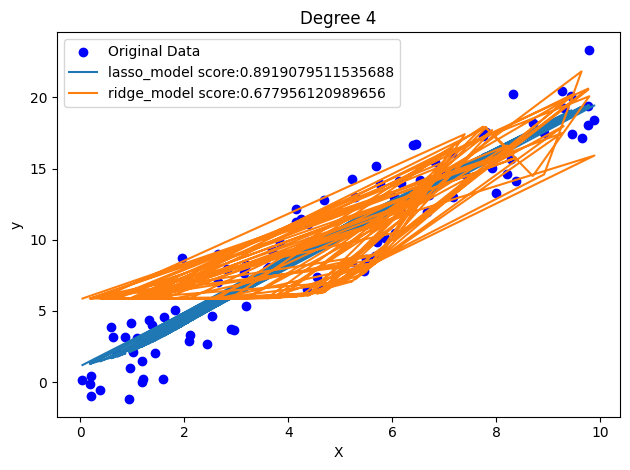

In [41]:

    # 创建多项式特征
    # 设置不同的特征数量
    degree = 4
    poly_reg = PolynomialFeatures(degree)
    X_poly = poly_reg.fit_transform(X)
    plt.scatter(X, y, color="blue", label="Original Data")
    # 使用 L1 正则化的线性回归建模
    lasso_model = make_pipeline(poly_reg, Lasso(alpha=0.1))
    lasso_model.fit(X_poly, y)
    y_pred_lasso = lasso_model.predict(X_poly)
    # 使用 L2 正则化的线性回归建模
    ridge_model = make_pipeline(poly_reg, Ridge(alpha=0.1))
    ridge_model.fit(X_poly, y)
    y_pred_ridge = ridge_model.predict(X_poly)
    plt.plot(
        X,
        y_pred_lasso,
        label=f"lasso_model score:{lasso_model.score(X_poly, y)}",
    )
    plt.plot(
        X,
        y_pred_ridge,
        label=f"ridge_model score:{ridge_model.score(X_poly, y)}",
    )

    # 设置子图的标题和标签
    plt.title(f"Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
# plt.show()

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.127e+02, tolerance: 3.680e-01
  model = cd_fast.enet_coordinate_descent(


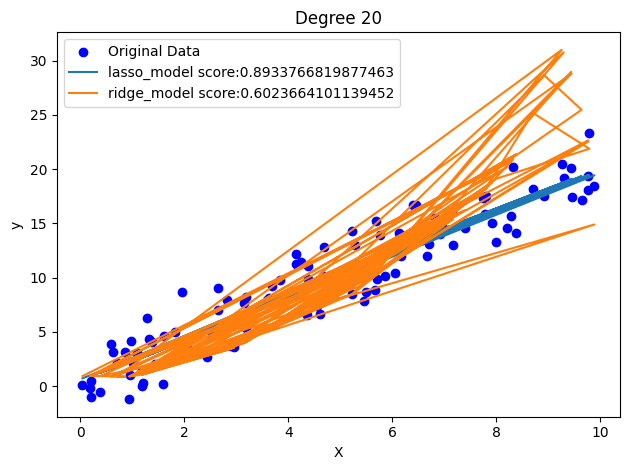

In [39]:

    # 创建多项式特征
    # 设置不同的特征数量
    degree = 20
    alpha=0.1
    poly_reg = PolynomialFeatures(degree)
    plt.scatter(X, y, color="blue", label="Original Data")
    # 使用 L1 正则化的线性回归建模
    lasso_model = make_pipeline(poly_reg, Lasso(alpha))
    lasso_model.fit(X, y)
    y_pred_lasso = lasso_model.predict(X)
    # 使用 L2 正则化的线性回归建模
    ridge_model = make_pipeline(poly_reg, Ridge(alpha))
    ridge_model.fit(X, y)
    y_pred_ridge = ridge_model.predict(X)
    plt.plot(
        X,
        y_pred_lasso,
        label=f"lasso_model score:{lasso_model.score(X, y)}",
    )
    plt.plot(
        X,
        y_pred_ridge,
        label=f"ridge_model score:{ridge_model.score(X, y)}",
    )

    # 设置子图的标题和标签
    plt.title(f"Degree {degree}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

How does regularization affect the quality metrics of models?
$\\$
control complex  =>  Overfitting
we can improve alpha to adjust the complex

Lasso:
$L(\theta)=\frac{1}{2n} \sum_{i=1}^n(y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^m \lvert w_j\rvert \\ $

Ridge:
$L(\theta)=\frac{1}{2n} \sum_{i=1}^n(y_i-\hat{y_i})^2 + \alpha\sum_{j=1}^m  {w_j}^2 $

第一项是最小二乘损失，第二项是$L1$ 正则化项，$n$是样本数量，$m$是特征数量，$y_i$是第 $i$ 个样本的真实值，$\hat{y_i}$是预测值，$w_j$是第 $j$个特征的权重，$\alpha$是正则化参数。
通过调整正则化参数 $\alpha$的值，我们可以控制正则化项对模型的影响程度。较大的$\alpha$值会增加正则化的强度，使得模型更加趋向于简单的解决方案。
这些正则化项的引入可以帮助减少过拟合的风险，并提高模型的泛化能力

In [43]:
import numpy as np

def ridge_regression(X, y, alpha):
    n, m = X.shape
    identity = np.eye(m)
    
    # 计算权重
    w = np.linalg.inv(X.T @ X + alpha * identity) @ (X.T @ y)
    return w

In [47]:
# 自定义 L2 正则化权重计算
X_poly = poly_reg.fit_transform(X)
custom_weights = ridge_regression(X_poly, y, alpha)
# 打印自定义权重
print("自定义 L2 正则化权重:", custom_weights)

# 打印内置模型权重
print("内置 L2 正则化权重:", ridge_model.named_steps['ridge'].coef_)

自定义 L2 正则化权重: [[ 9.64182505e-04]
 [ 2.00850867e+00]
 [ 3.59818475e-02]
 [-8.33825665e-03]
 [ 4.67943853e-04]]
内置 L2 正则化权重: [ 0.00000000e+00  0.00000000e+00  5.00487914e-18  4.01381062e-17
  2.72994439e-16  1.75380802e-15  0.00000000e+00  5.00487914e-18
  4.01381062e-17  2.72994439e-16  1.75380802e-15  4.01381062e-17
  2.72994439e-16  1.75380802e-15  1.08739340e-14  1.75380802e-15
  1.08739340e-14  6.52766103e-14  6.52766103e-14  3.77876602e-13
  2.08993324e-12  0.00000000e+00  5.00487914e-18  4.01381062e-17
  2.72994439e-16  1.75380802e-15  4.01381062e-17  2.72994439e-16
  1.75380802e-15  1.08739340e-14  1.75380802e-15  1.08739340e-14
  6.52766103e-14  6.52766103e-14  3.77876602e-13  2.08993324e-12
  2.72994439e-16  1.75380802e-15  1.08739340e-14  6.52766103e-14
  1.08739340e-14  6.52766103e-14  3.77876602e-13  3.77876602e-13
  2.08993324e-12  1.08717624e-11  6.52766103e-14  3.77876602e-13
  2.08993324e-12  2.08993324e-12  1.08717624e-11  5.18208894e-11
  1.08717624e-11  5.18208894e-11

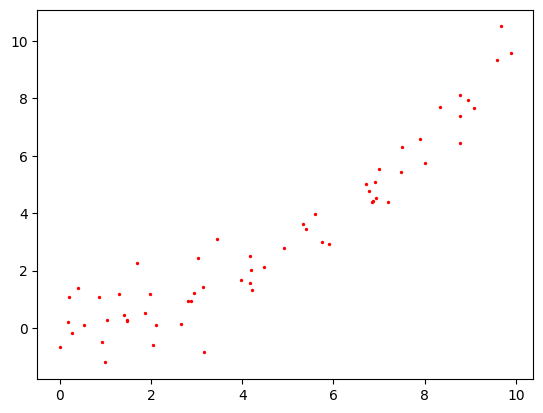

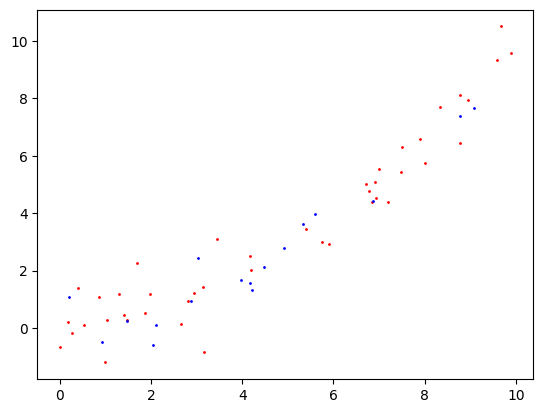

In [48]:
# 生成随机数据
rng = np.random.RandomState(1)
x = 10 * rng.rand(60)
y = x**2 / 10 + 0.9 * rng.randn(60)
# 绘制散点图
plt.scatter(x, y, c="red", s=2)
plt.show()
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    # x[:, np.newaxis] 将 x 转换为列向量（二维数组），y 保持一维。test_size=0.27 表示 27% 的数据将用于测试，73% 用于训练。random_state=42 确保每次运行时划分结果相同。
    x[:, np.newaxis],
    y,
    test_size=0.27,
    random_state=42,
)
# 绘制训练集和测试集的散点图
plt.scatter(X_train, y_train, c="red", s=1)
plt.scatter(X_test, y_test, c="blue", s=1)
plt.show()

C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.420e+00, tolerance: 4.127e-02
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.200e+01, tolerance: 4.127e-02
  model = cd_fast.enet_coordinate_descent(
C:\Program Files\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+01, to

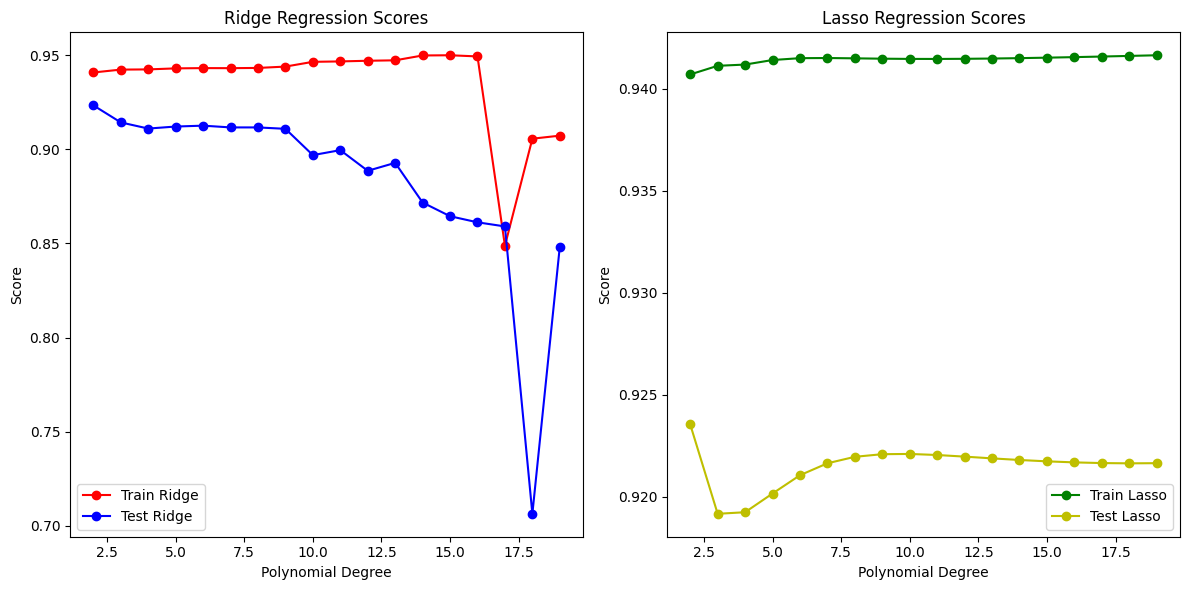

In [62]:
# 定义多项式的度数范围
degrees = list(range(2, 20))
# 初始化分数列表
scores_test_ridge = []
scores_train_ridge = []
scores_test_lasso = []
scores_train_lasso = []

# 循环训练模型并计算得分
for i in degrees:
    # Ridge模型
    ridge_model = make_pipeline(PolynomialFeatures(degree=i), Ridge(alpha=0.1))
    ridge_model.fit(X_train, y_train)
    scores_test_ridge.append(ridge_model.score(X_test, y_test))
    scores_train_ridge.append(ridge_model.score(X_train, y_train))

    # Lasso模型
    lasso_model = make_pipeline(PolynomialFeatures(degree=i), Lasso(alpha=0.1))
    lasso_model.fit(X_train, y_train)
    scores_test_lasso.append(lasso_model.score(X_test, y_test))
    scores_train_lasso.append(lasso_model.score(X_train, y_train))

# 创建一个窗口，设置子图
plt.figure(figsize=(12, 6))

# Ridge得分图
plt.subplot(1, 2, 1)
plt.plot(degrees, scores_train_ridge, "r-o", label="Train Ridge")
plt.plot(degrees, scores_test_ridge, "b-o", label="Test Ridge")
plt.xlabel("Polynomial Degree")
plt.ylabel("Score")
plt.title("Ridge Regression Scores")
plt.legend()

# Lasso得分图
plt.subplot(1, 2, 2)
plt.plot(degrees, scores_train_lasso, "g-o", label="Train Lasso")
plt.plot(degrees, scores_test_lasso, "y-o", label="Test Lasso")
plt.xlabel("Polynomial Degree")
plt.ylabel("Score")
plt.title("Lasso Regression Scores")
plt.legend()

# 显示图形
plt.tight_layout()
plt.show()
